# Polynomial interpolation

---

Perform polynomial interpolation of air density from the data in the following table.
$$
\begin{aligned}
& \text {Table with air density against temperature}\\
&\begin{array}{c|c}
 Temperature & Density \\
 ^\circ\,C & kg\,m^{-3} \\
 \hline
 100 & 0.946 \\
 150 & 0.835 \\
 200 & 0.746 \\
 250 & 0.675 \\
 300 & 0.616 \\
 400 & 0.525 \\
 500 & 0.457
\end{array}
\end{aligned}
$$

In [4]:
import numpy as np
from IPython.display import display, Math

# Input the data
# Temperature
T = [100, 150, 200, 250, 300, 400, 500]    
# Air density
rho = [0.946, 0.835, 0.746, 0.675, 0.616, 0.525, 0.457]

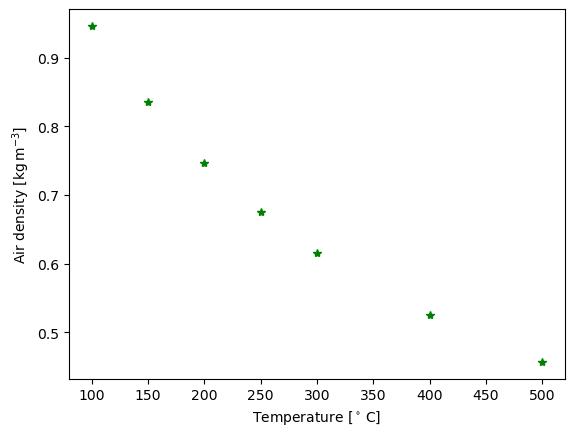

In [5]:
# Plot the data
import matplotlib.pyplot as plt

plt.plot(T, rho, 'g*')
plt.xlabel("Temperature [$^\circ\,$C]")
plt.ylabel("Air density [kg$\,$m$^{-3}$]")
plt.show()

## Part a)

Use Lagrange interpolation to calculate the air density at $350^\circ\,$C from the measured data between $300^\circ\,$C and $500^\circ\,$C.

In [6]:
# Temperature at which the air density is sought
T0 = 350

# Form Lagrange multipliers
L = []
os = 4     # Offset to get to the correct position in the data
for i in range(3):
    tmp = 1
    for j in range(3):
        if i != j:
            tmp = tmp * (T0 - T[j+os])/(T[i+os] - T[j+os])
    L.append(tmp)   


# Calculate the air density at T0
rho_T0 = 0
for i in range(3):
    rho_T0 = rho_T0 + L[i] * rho[i+os]
rho_T0
display(Math(r"\text{{The air density at }} {} ^\circ \text{{C is }}{:0.4f} \,kg\, m^{{-3}}".format(T0, rho_T0)))

<IPython.core.display.Math object>

*Remark:* You should try a few different values and add the value to the plot.

## Part b)

Calculate the Newton interpolation coefficients for the support points $300^\circ\,$C and $400^\circ\,$C. Add a third support point and calculate the air density at $350^\circ\,$C.

In [ ]:
# Temperature at which the air density is sought
T0 = 350
# Offset to get to the correct position in the data
os = 4     

# Calculate the Newton interpolation coefficients
a = []
a.append(rho[0+os])
a.append((rho[1+os] - rho[0+os]) / (T[1+os] - T[0+os]))

In [ ]:
# Calculate the air density at T0
rho_T0 = a[0] + a[1] * (T0 - T[0+os])
display(Math(r"\text{{The air density at }} {} ^\circ \text{{C is }}{:0.4f} \,kg\, m^{{-3}}".format(T0, rho_T0)))

The air density at $T=350^\circ\,$C calculated by Newton interpolation with two support points is $\rho=0.5705\,$kg$\,$m$^{-3}$.

Now we add a third interpolation point.

In [ ]:
# Add a third interpolation points
# Set to -1 for T=250 and to 2 for T=500
idx = -1

tmp = (rho[idx+os]- rho[1+os]) / (T[idx+os] - T[1+os])
a.append((tmp - a[1]) / (T[idx+os] - T[0+os]))

rho_T0_3rd = a[0] + a[1] * (T0 - T[0+os]) + a[2] * (T0 - T[0+os]) * (T0 - T[1+os])
display(Math(r"\text{{The air density at }} {} ^\circ \text{{C is }}{:0.4f} \,kg\, m^{{-3}}".format(T0, rho_T0_3rd)))

 When we add a third support point at $T=500^\circ\,$C we get the same result as for the case of the Lagrange interpolation in part (a), i.e. $\rho=0.5676\,$kg$\,$m$^{-3}$. This is expected because the second order polynomial through the three support points is unique.

*Remark:* When we instead add a third support point at $T=250^\circ\,$C we get $\rho=0.5660\,$kg$\,$m$^{-3}$ which is slightly different from the other two interpolations. You should try this.

## Part c)

Use the Python functions numpy.interp to interpolate the air density between $300^\circ\,$C and $500^\circ\,$C. Plot the interpolated air density and the measured air densities at the three support points.

In [ ]:
import numpy as np
T0 = 350

# What are the next two lines doing?
os = 4
length = 3

rho_T0_np = np.interp(T0, T[os:os+length], rho[os:os+length])
display(Math(r"\text{{The air density at }} {} ^\circ \text{{C is }}{:0.4f} \,kg\, m^{{-3}}".format(T0, rho_T0_np)))

In [ ]:
x = np.linspace(300, 500, 201)

plt.plot(T[os:os+length], rho[os:os+length], 'x', label="Measured points")
plt.plot(x, np.interp(x, T[os:os+length], rho[os:os+length]), 'r', label="Interpolation")
plt.xlabel("Temperature [$^\circ\,$C]")
plt.ylabel("Air density [kg$\,$m$^{-3}$]")
plt.legend()
plt.show()

The plot shows that the numpy.interp function uses only linear interpolation which we could have expected from the value at $T=350^\circ\,$C or if we had looked at the documentation: https://numpy.org/doc/stable/reference/generated/numpy.interp.html

## Part d) 

Use the Python functions scipy.interpolate.interp1d to interpolate the air density between $300^\circ\,$C and $500^\circ\,$C. Plot the interpolated air density and the measured air densities at the three support points.

In [ ]:
from scipy import interpolate

os = 4
length = 3
f = interpolate.interp1d(T[os:os+length], rho[os:os+length], "quadratic", fill_value="extrapolate")
x = np.linspace(300, 500, 201)

plt.plot(T[os:os+length], rho[os:os+length], 'x', label="Measured points")
plt.plot(x, f(x), 'r', label="Interpolation")
plt.xlabel("Temperature [$^\circ\,$C]")
plt.ylabel("Air density [kg$\,$m$^{-3}$]")
plt.legend()
plt.show()
display(Math(r"\text{{The air density at }} {} ^\circ \text{{C is }}{:0.4f} \,kg\, m^{{-3}}".format(T0, f(T0))))

We can see that this interpolation is quadratic and produces the same interpolated value as the two examples in parts a) and the second interpolation in part b).

## Part e)

Calculate the air density at $200^\circ\,$C from the interpolation and compare the value to the measured value. Extend the plot from part d) to $200^\circ\,$C.

In [ ]:
from scipy import interpolate
# Offset
os = 2 
# length
length = 5

T0 = 200
x = np.linspace(200, 500, 301)

plt.plot(T[os:os+length], rho[os:os+length], 'x', label="Measured points")
plt.plot(x, f(x), 'r', label="Interpolation")
plt.xlabel("Temperature [$^\circ\,$C]")
plt.ylabel("Air density [kg$\,$m$^{-3}$]")
plt.legend()
plt.show()
display(Math(r"\text{{The air density at }} {} ^\circ \text{{C is }}{:0.4f} \,kg\, m^{{-3}}".format(T0, f(T0))))

The interpolated value is $\rho_{i,200}=0.73$ compared to the true value of $\rho_{200}=0.746$. This gives a relative error of
$$
e = \frac{0.746-0.73}{0.746} = 0.021
$$
In this case, the extrapolation beyond the support point interval gives a reasonably good approximation. This is due to the fact that the exact data almost follows a quadratic curve.